In [283]:
import pandas as pd
import numpy as np 
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

####Process Data

In [184]:
nyc_rac = pd.read_csv("ny_rac_S000_JT02_2012.csv", dtype = {'h_geocode': object})

count_filter = ['36005', '36047', '36061', '36081', '36085']
nyc_rac = nyc_rac[nyc_rac['h_geocode'].apply(lambda x: x[0:5]).isin(count_filter)]

In [ ]:
nyc_rac = nyc_rac[list(nyc_rac.columns)[:-1]]

In [175]:
nyc_rac.loc[:,('group_code')] = nyc_rac['h_geocode'].apply(lambda x: x[:-4])

In [180]:
nyc_rac_grouped = nyc_rac.groupby('group_code')[list(nyc_rac.columns)[:-1]].agg('sum')
del nyc_rac_grouped['createdate']

In [191]:
nyc_rac_grouped = nyc_rac_grouped[list(nyc_rac_grouped.columns)[7:27]]

In [192]:
nyc_rac_grouped.head()

,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
group_code,,,,,,,,,,,,,,,,,,,,
36005000100,1,0,1,39,32,37,125,46,18,19,22,25,5,78,22,219,13,77,32,0
36005000200,0,0,5,27,35,57,178,50,31,47,50,59,22,81,49,269,33,104,62,0
36005000400,0,0,9,59,42,76,179,64,51,84,79,114,30,106,73,357,32,160,78,0
36005001600,1,0,8,44,41,41,230,59,44,59,81,94,23,116,74,442,37,110,74,0
36005001900,0,1,2,21,33,41,91,22,21,49,24,40,13,48,26,149,13,75,37,0


In [194]:
group_code_index = nyc_rac_grouped.index

In [196]:
rac_array = nyc_rac_grouped.values 

In [199]:
rac_array = rac_array.astype(float)

In [311]:
data = scale(rac_array)

####K-Means Clustering

In [312]:
n_samples, n_features = data.shape

In [284]:
number_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [316]:
reduced_data = PCA(n_components=2).fit_transform(data)

In [328]:
kmeans = KMeans(init='k-means++', n_clusters=number_k[4], n_init=10)

In [329]:
kmeans.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

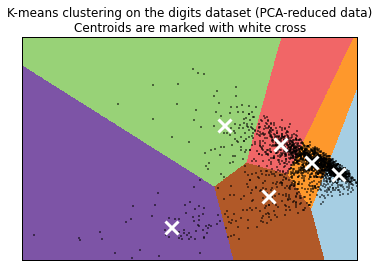

In [330]:
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()